<a href="https://colab.research.google.com/github/Eyad-dev/UK_Train_Rides/blob/main/UK_Train_Ridership.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Project: UK Train Ridership
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Loading the dataset
df = pd.read_csv("Depi project railway.csv")

In [2]:
#Displaying the first 5 rows to observe the dataset
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Price,Departure Station,Arrival Destination,...,Delay in Minutes,Refund Amount,Revenue,Days Between Purchase and Journey,Is Delayed,Month Name,Day Name,Is Weekend,Day Journey Period,Day Purchase Period
0,da8a6ba8-b3dc-4677-b176,12/8/2023,12:41:11 PM,Online,Contactless,Adult,Standard,43,London Paddington,Liverpool Lime Street,...,0,0,43,24,No,January,Monday,No,Morning,Evening
1,b0cdd1b0-f214-4197-be53,12/16/2023,11:23:01 AM,Station,Credit Card,Adult,Standard,23,London Kings Cross,York,...,5,0,23,16,Yes,January,Monday,No,Morning,Morning
2,f3ba7a96-f713-40d9-9629,12/19/2023,7:51:27 PM,Online,Credit Card,NaN,Standard,3,Liverpool Lime Street,Manchester Piccadilly,...,0,0,3,14,No,January,Tuesday,No,Night,Night
3,b2471f11-4fe7-4c87-8ab4,12/20/2023,11:00:36 PM,Station,Credit Card,NaN,Standard,13,London Paddington,Reading,...,0,0,13,12,No,January,Monday,No,Night,Night
4,2be00b45-0762-485e-a7a3,12/27/2023,6:22:56 PM,Online,Contactless,NaN,Standard,76,Liverpool Lime Street,London Euston,...,0,0,76,5,No,January,Monday,No,Evening,Night


In [3]:
#Displaying the shape of the dataset [rows, columns]
print("Shape",df.shape)
print("----------------------------------------------------------------------------")
#Displaying each column individually
print(df.columns.tolist())
print("----------------------------------------------------------------------------")
#Observing the datatypes of each column
#We get to see that "Price" column is the only different column being an int64 data type
print(df.dtypes)

Shape (31653, 28)
----------------------------------------------------------------------------
['Transaction ID', 'Date of Purchase', 'Time of Purchase', 'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class', 'Price', 'Departure Station', 'Arrival Destination', 'Date of Journey', 'Departure Time', 'Arrival Time', 'Actual Arrival Time', 'Reason for Delay', 'Journey Status', 'Ticket Type', 'Refund Request', 'Delay in Minutes', 'Refund Amount', 'Revenue', 'Days Between Purchase and Journey', 'Is Delayed', 'Month Name', 'Day Name', 'Is Weekend', 'Day Journey Period', 'Day Purchase Period']
----------------------------------------------------------------------------
Transaction ID                       object
Date of Purchase                     object
Time of Purchase                     object
Purchase Type                        object
Payment Method                       object
Railcard                             object
Ticket Class                         object
Price         

In [4]:
#Description of the dataset
display(df.describe())


,Price,Delay in Minutes,Refund Amount,Revenue,Days Between Purchase and Journey
count,31653.000000,31653.000000,31653.000000,31653.000000,31653.000000
mean,23.439200,2.156289,0.483714,22.956023,1.655957
std,29.997628,8.993106,4.884735,29.774300,3.853255
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,5.000000,0.000000
50%,11.000000,0.000000,0.000000,10.000000,1.000000
75%,35.000000,0.000000,0.000000,34.000000,1.000000
max,267.000000,59.000000,176.000000,267.000000,28.000000


In [5]:
#Checking for missing values
#There is shown to be 3 columns with a bunch of missing data *especially reason for delay*
#However That is how actually a dataset would be in this case
#Railcard can possibly have missing data because its not guranteed that every passenger is
#subscribed to the railcard system
#Some Actual arrival time cells are missing due to *Cancelled* trips so there was no
#Arrival in the first place
#Some cells in "Reason for delay" are empty because there were no delays during these cases
print(df.isnull().sum())
print("----------------------------------------------------------------------------")

#Checking for Duplicates
print("Duplicated values: ",df.duplicated().sum())

Transaction ID                           0
Date of Purchase                         0
Time of Purchase                         0
Purchase Type                            0
Payment Method                           0
Railcard                             20918
Ticket Class                             0
Price                                    0
Departure Station                        0
Arrival Destination                      0
Date of Journey                          0
Departure Time                           0
Arrival Time                             0
Actual Arrival Time                   1880
Reason for Delay                         0
Journey Status                           0
Ticket Type                              0
Refund Request                           0
Delay in Minutes                         0
Refund Amount                            0
Revenue                                  0
Days Between Purchase and Journey        0
Is Delayed                               0
Month Name 

In [9]:
#Filling missing values
df['Railcard']= df['Railcard'].fillna("No Railcard")
df['Reason for Delay'] = df['Reason for Delay'].fillna("No Reason")
#Check if missing values are filled
df[df['Railcard'].isna() & df['Reason for Delay'].isna()]
#As seen here There are no more missing values for the 2 these columns

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Price,Departure Station,Arrival Destination,...,Delay in Minutes,Refund Amount,Revenue,Days Between Purchase and Journey,Is Delayed,Month Name,Day Name,Is Weekend,Day Journey Period,Day Purchase Period


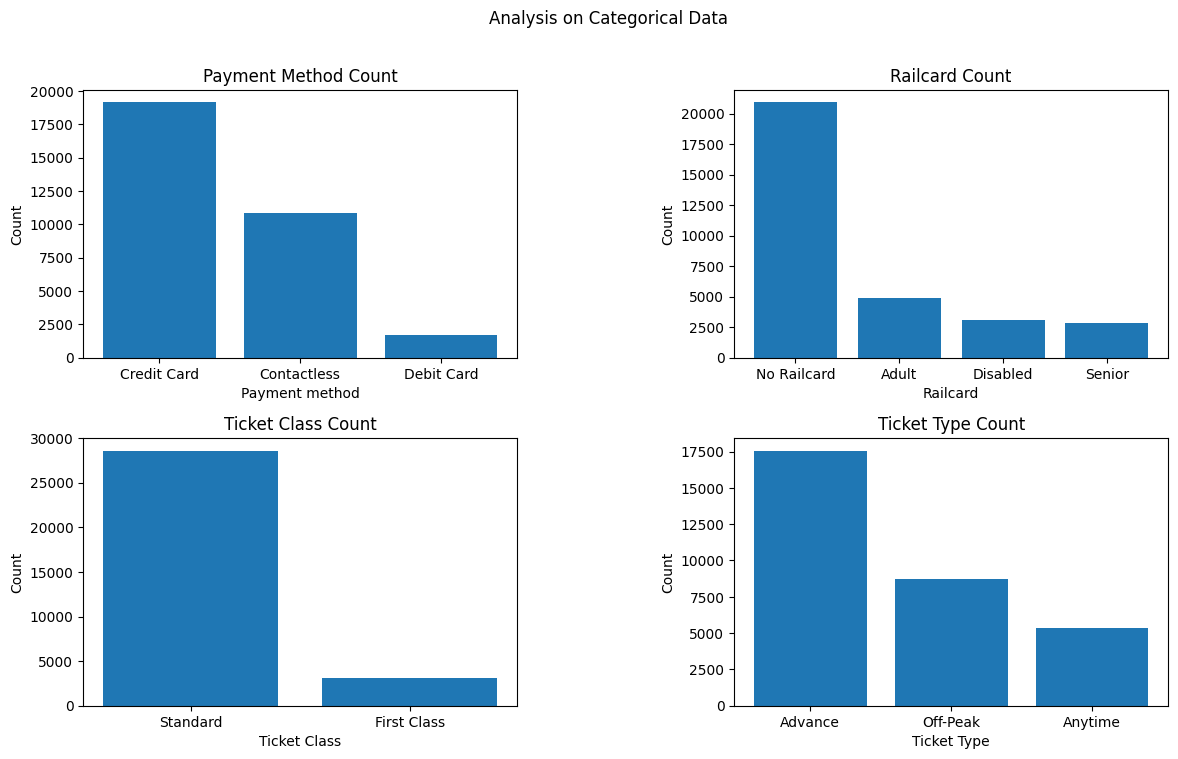

In [7]:
#Plot that compares a set of columns to their values
#Adjusting the plot size, grids, and spacing
fig, axs = plt.subplots(2,2, figsize=(14,8))
plt.subplots_adjust(
    hspace = 0.3,
    wspace = 0.5
)
fig.suptitle("Analysis on Categorical Data")
#Store Values of "Payment method" in paymentCount
paymentCount= df['Payment Method'].value_counts()
axs[0, 0].bar(paymentCount.index, paymentCount.values)
axs[0, 0].set(xlabel = 'Payment method', ylabel = 'Count', title = 'Payment Method Count')
#Store Values of "Railcard" in railcardCount
railcardCount = df['Railcard'].value_counts()
axs[0, 1].bar(railcardCount.index, railcardCount.values)
axs[0, 1].set(xlabel = 'Railcard', ylabel = 'Count', title = 'Railcard Count')
#Store Values of "Ticket Class" in ticketClassCount
ticketClassCount = df['Ticket Class'].value_counts()
axs[1, 0].bar(ticketClassCount.index, ticketClassCount.values)
axs[1, 0].set(xlabel = 'Ticket Class', ylabel = 'Count', title='Ticket Class Count')
#Store Values of "Ticket Type" in ticketTypeCount
ticketTypeCount = df['Ticket Type'].value_counts()
axs[1, 1].bar(ticketTypeCount.index, ticketTypeCount.values)
axs[1, 1].set(xlabel = 'Ticket Type', ylabel = 'Count', title = 'Ticket Type Count')
plt.show()

In [8]:
#Saving the newly modified dataset locally
df.to_csv("Depi project railway copy.csv")